In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
import ReadRawMHD as rR

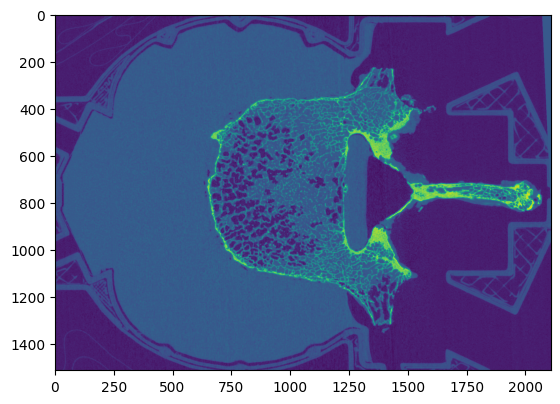

In [2]:
sample_code = '05_Pilot5'  # Experimental sample. contains number and sample name, e.g. 00_Pilot3.
path_project = '/home/biomech/Documents/01_Icotec/'  # General project folder
path_ct = path_project + '01_Experiments/02_Scans/' + sample_code + '/04_Registered/'  # Folder of CT data
filenameB = path_ct + 'Icotec_S130684_L4_intact.mhd'
imB = np.transpose(sitk.GetArrayFromImage(sitk.ReadImage(filenameB)), [2, 1, 0])
filenameS = path_ct + 'Icotec_S130684_L4_mask.mhd'
imS = np.transpose(sitk.GetArrayFromImage(sitk.ReadImage(filenameS)), [2, 1, 0])

plt.imshow(imB[:, 500, :])

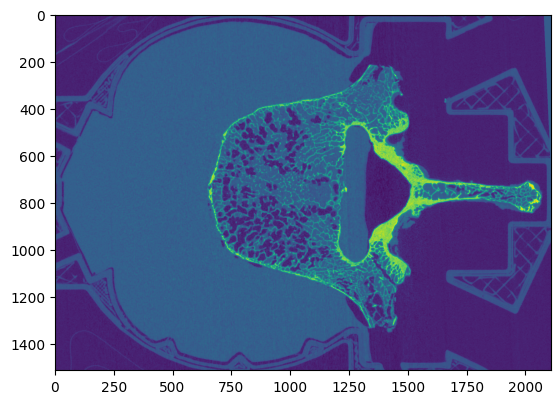

In [3]:
plt.imshow(imB[:, 450, :])

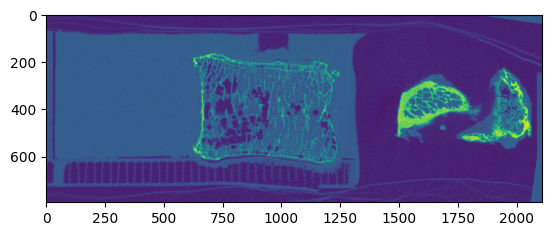

In [4]:
plt.imshow(imB[800, :, :])

In [5]:
# HERE not working
imB = sitk.GetImageFromArray(np.transpose(imB[80:1470, 150:650, 400:1800], [2, 1, 0]))
imB.SetSpacing([0.0606995, 0.0606995, 0.0606995])
imB.SetOrigin([0, 0, 0])
sitk.WriteImage(imB, filenameB.split('.')[0] + '_crop.mhd')
del imB
imS = sitk.GetImageFromArray(np.transpose(imS[80:1470, 150:650, 400:1800], [2, 1, 0]))
imS.SetSpacing([0.0606995, 0.0606995, 0.0606995])
imS.SetOrigin([0, 0, 0])
sitk.WriteImage(imS, filenameS.split('.')[0] + '_crop.mhd')
del imS

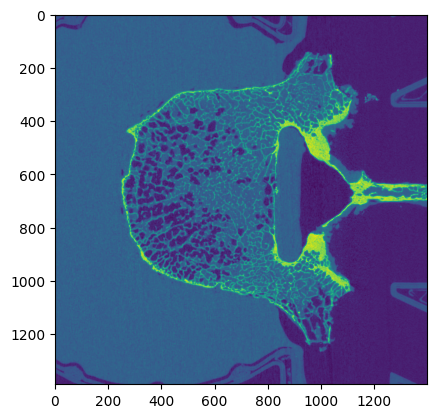

In [6]:
imB = np.transpose(sitk.GetArrayFromImage(sitk.ReadImage(filenameB.split('.')[0] + '_crop.mhd')), [2, 1, 0])
imS = np.transpose(sitk.GetArrayFromImage(sitk.ReadImage(filenameS.split('.')[0] + '_crop.mhd')), [2, 1, 0])

#im = (np.transpose(sitk.GetArrayFromImage(sitk.ReadImage(filename)), [2, 1, 0])>=320).astype(int)
plt.imshow(imB[:, 340, :])

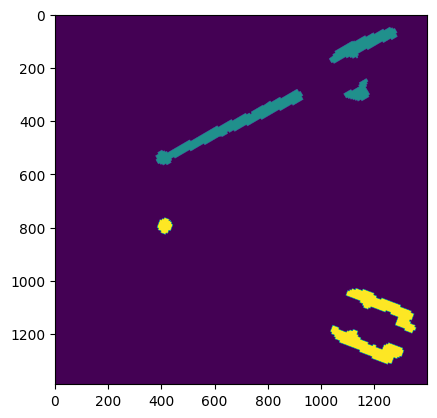

In [7]:
plt.imshow(imS[:, 340, :])

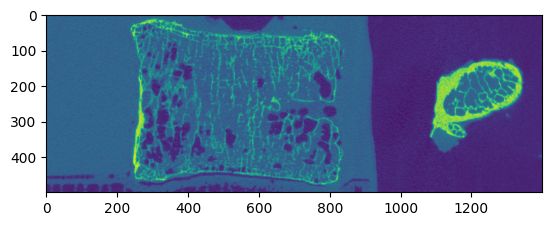

In [8]:
plt.imshow(imB[620, :, :])

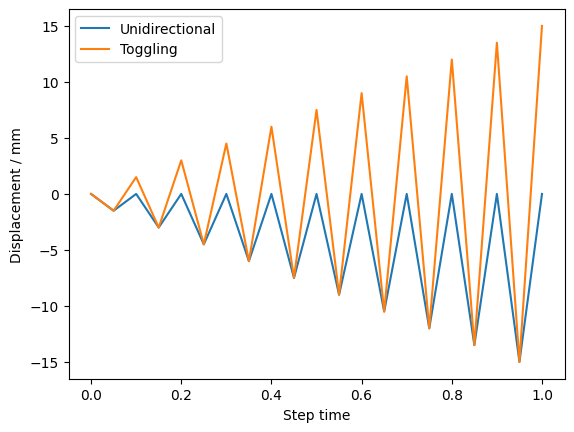

In [9]:
dmax = -15
time = np.arange(start=0, stop=1.0005, step=0.05)
ampl = np.array([0, 0.1, 0, 0.2, 0, 0.3, 0, 0.4, 0, 0.5, 0, 0.6, 0, 0.7, 0, 0.8, 0, 0.9, 0, 1, 0])

ampt = np.array([0, 0.1, -0.1, 0.2, -0.2, 0.3, -0.3, 0.4, -0.4, 0.5, -0.5, 0.6, -0.6, 0.7, -0.7, 0.8, -0.8, 0.9, -0.9, 1, -1])

plt.plot(time, ampl*dmax, label='Unidirectional')
plt.plot(time, ampt*dmax, label='Toggling')
plt.xlabel('Step time')
plt.ylabel('Displacement / mm')
plt.legend()

Text(0, 0.5, 'Logarithmic strain')

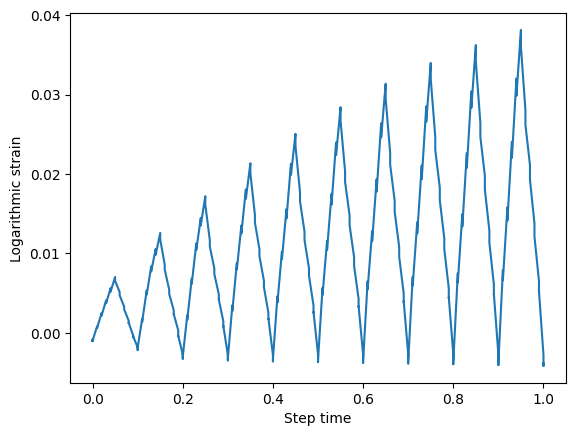

In [10]:
file_ = '/home/biomech/Documents/01_Icotec/02_FEA/98_Pilots/03_Pilot3/50_L50_S00_D30/E_PEEK.txt'
df = np.loadtxt(file_, delimiter='\t')
time = np.array(df[:, 0])
strain = np.array(df[:, 1])
plt.plot(time[40:]-1, strain[40:])
plt.xlabel('Step time')
plt.ylabel('Logarithmic strain')